# Overview:
## In this project i am trying to find the current selling price of Old vehicles.

# importing some basic packages

In [7]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading CSV file using pandas

In [8]:
df = pd.read_csv('UNI.csv')

# No. of Rows vs Columns

In [9]:
df.shape

(1000, 12)

# Top 5 rows of data

In [10]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


# Checking if any null value is there in data

In [11]:
df.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

# Age of vehicle vs Selling price

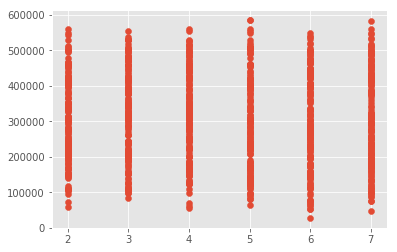

In [15]:
plt.scatter(df['years'], df['current price'])
plt.show()

# KM driven Vs Selling price

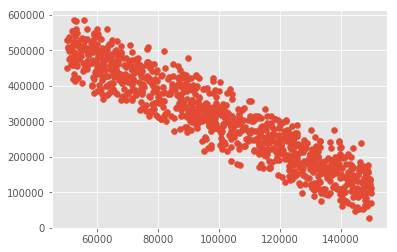

In [21]:
plt.scatter(df['km '], df['current price'])
plt.show()

# importing linear regression model and train-test split from sklearn

In [22]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [25]:
df.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km ', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

# Features of data

In [27]:
x = df[['on road old', 'on road now', 'years', 'km ', 'rating', 'condition',
       'economy', 'top speed', 'hp', 'torque']]

# Target of data

In [28]:
y = df['current price']

# Splitting Train-Test data in 70:30 ratio

In [31]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

# Checking train - test data shape

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 10)
(300, 10)
(700,)
(300,)


# Training model

In [33]:
lm.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
print(lm.coef_)

[ 5.23219712e-01  4.92354737e-01 -1.49173427e+03 -3.99566676e+00
  7.09820880e+00  4.62654304e+03  1.69596872e+02 -6.16544819e-01
 -6.96674864e+00  1.35707621e+01]


# Predicting target for test data using trained model 

In [35]:
lm.predict(x_test)

array([373916.97271201, 511038.38847239, 153665.86433126, 162016.34118952,
       510087.5941239 , 319986.10622255, 526810.50504269, 276490.85026348,
       381386.51990232, 214766.2055822 , 316223.88145227, 155679.87106406,
       275019.80328496, 499718.70453662, 558251.28641384, 224126.92470512,
       443075.43162688, 232403.53853912, 261219.02443836, 189803.48142471,
       414957.01255838, 219259.54962924, 408063.97602533, 304411.80599848,
       115983.31863396, 252398.26122299, 354994.7084072 , 210320.58813034,
       262669.51680294, 464468.43125789, 106723.92777454, 106008.14603057,
       539357.73482916, 323298.47845189, 335220.21089971, 157663.27249725,
       247651.47049498, 501073.51952894, 494325.17391736, 371400.40790239,
       285915.56097766, 529271.67414307, 401238.08007725, 181840.12673439,
       535169.19379922, 232899.78006389, 464187.21557129, 437892.09089773,
       420438.45607983, 366792.21192574, 411119.42071064, 254095.51139925,
       345044.07187591, 2

In [ ]:
import statsmodels.api as sm
X_endog = sm.add_constant(X_test)

In [40]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [41]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6125.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:09:36   Log-Likelihood:                -3141.2
No. Observations:                 300   AIC:                             6304.
Df Residuals:                     289   BIC:                             6345.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.113e+04   1.17e+04     -1.811      0.071   -4.41e+04    1836.330
on road old     0.5232      0.009     60.313      0.000       0.506       0.540
on road now     0.4924      0.009     55.585      0.000       0.475       0.510
years       -1491.7343    306.400     -4.869      0.000   -2094.793    -888.676
km             -3.9957      0.017   -229.346      0.000      -4.030      -3.961
rating          7.0982    367.326      0.019      0.985    -715.875     730.072
condition    4626.5430    182.858     25.301      0.000    4266.641    4986.445
economy       169.5969    231.253      0.733      0.464    -285.557     624.750
top speed      -0.6165     26.751     -0.023      0.982     -53.268      52.035
hp             -6.9667     24.137     -0.289      0.773     -54.472      40.539
torque         13.5708     23.441      0.579      0.563     -32.566      59.708
==============================================================================
Omnibus:                       24.846   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.842
Skew:                           0.744   Prob(JB):                     5.46e-07
Kurtosis:                       2.692   Cond. No.                     2.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
df_1 = pd.read_csv('unitest_1.csv')

In [49]:
v_id = df_1['v.id']

In [51]:
# v_id

In [46]:
x_test.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
521,693986,727374,3,82191,5,1,9,139,107,99
737,580888,897357,6,57543,1,5,9,172,99,105
740,533346,733566,6,123028,3,7,11,140,103,120
660,507983,761811,3,116587,3,2,14,169,90,124
411,655963,766226,5,50648,3,4,11,140,112,78


In [52]:
df_to_predict = df_1.drop(['v.id'], axis=1)

In [54]:
df_to_predict.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,514396,881378,3,115717,3,4,10,144,70,117
1,654594,749943,7,135999,1,2,13,161,51,70
2,559836,865594,4,142651,1,6,10,184,116,72
3,523784,870895,5,57223,4,2,14,170,76,102
4,547534,824478,4,51927,5,6,9,162,53,71


In [56]:
predictions = lm.predict(df_to_predict)

# converting predicted values as dataframe

In [58]:
predictions  = pd.DataFrame(predictions)

# Rounding-up predicted values to digit 1

In [61]:
predictions = predictions.round(1)

In [2]:
# predictions

# Predicted Current selling price for unknown data

In [65]:
df_to_predict

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,predicted_current_price
0,514396,881378,3,115717,3,4,10,144,70,117,236351.8
1,654594,749943,7,135999,1,2,13,161,51,70,148712.0
2,559836,865594,4,142651,1,6,10,184,116,72,151527.6
3,523784,870895,5,57223,4,2,14,170,76,102,458012.5
4,547534,824478,4,51927,5,6,9,162,53,71,487647.9
5,554488,709832,2,67231,4,5,12,199,109,118,372773.7
6,618174,814171,7,126885,2,4,8,159,107,112,206289.1
7,680831,758582,3,72676,5,3,14,200,85,80,430377.1
8,527149,709456,3,125309,1,6,10,159,96,84,128652.1
9,690350,700856,7,146583,3,7,10,180,93,69,123282.2


In [67]:
df_to_predict.insert(0, "v.id", v_id)

In [69]:
df_to_predict.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,predicted_current_price
0,1,514396,881378,3,115717,3,4,10,144,70,117,236351.8
1,2,654594,749943,7,135999,1,2,13,161,51,70,148712.0
2,3,559836,865594,4,142651,1,6,10,184,116,72,151527.6
3,4,523784,870895,5,57223,4,2,14,170,76,102,458012.5
4,5,547534,824478,4,51927,5,6,9,162,53,71,487647.9


In [80]:
df_to_predict = df_to_predict[['v.id','predicted_current_price']]

# Coverting dataframe to CSV with predicted values

In [81]:
df_to_predict.to_csv('Predicted_current_price.csv', index=False)